# cse -221710305019-siddharth

## credit card fraud detection

# problem statment:
in this project ,we detect the fraud made using credit card by using different techniques/models

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### importing and reading the dataset

In [2]:
df= pd.read_csv('creditcard.csv')
df.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#data analysis
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.919560e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.688174e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.769071e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.782312e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552563e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.010663e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.694249e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.927028e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.137024e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.768627e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.170318e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.810658e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.693438e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.479045e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.482336e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392007e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.528491e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.328772e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.049732e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.085503e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.537294e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  7.959909e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.367590e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.458112e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.453003e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.699104e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660161e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.206049e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'frequency')

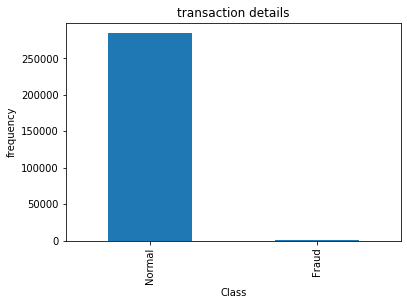

In [8]:
#visualizing the transaction details
LABELS=["Normal","Fraud"]
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar')
plt.title("transaction details")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("frequency")

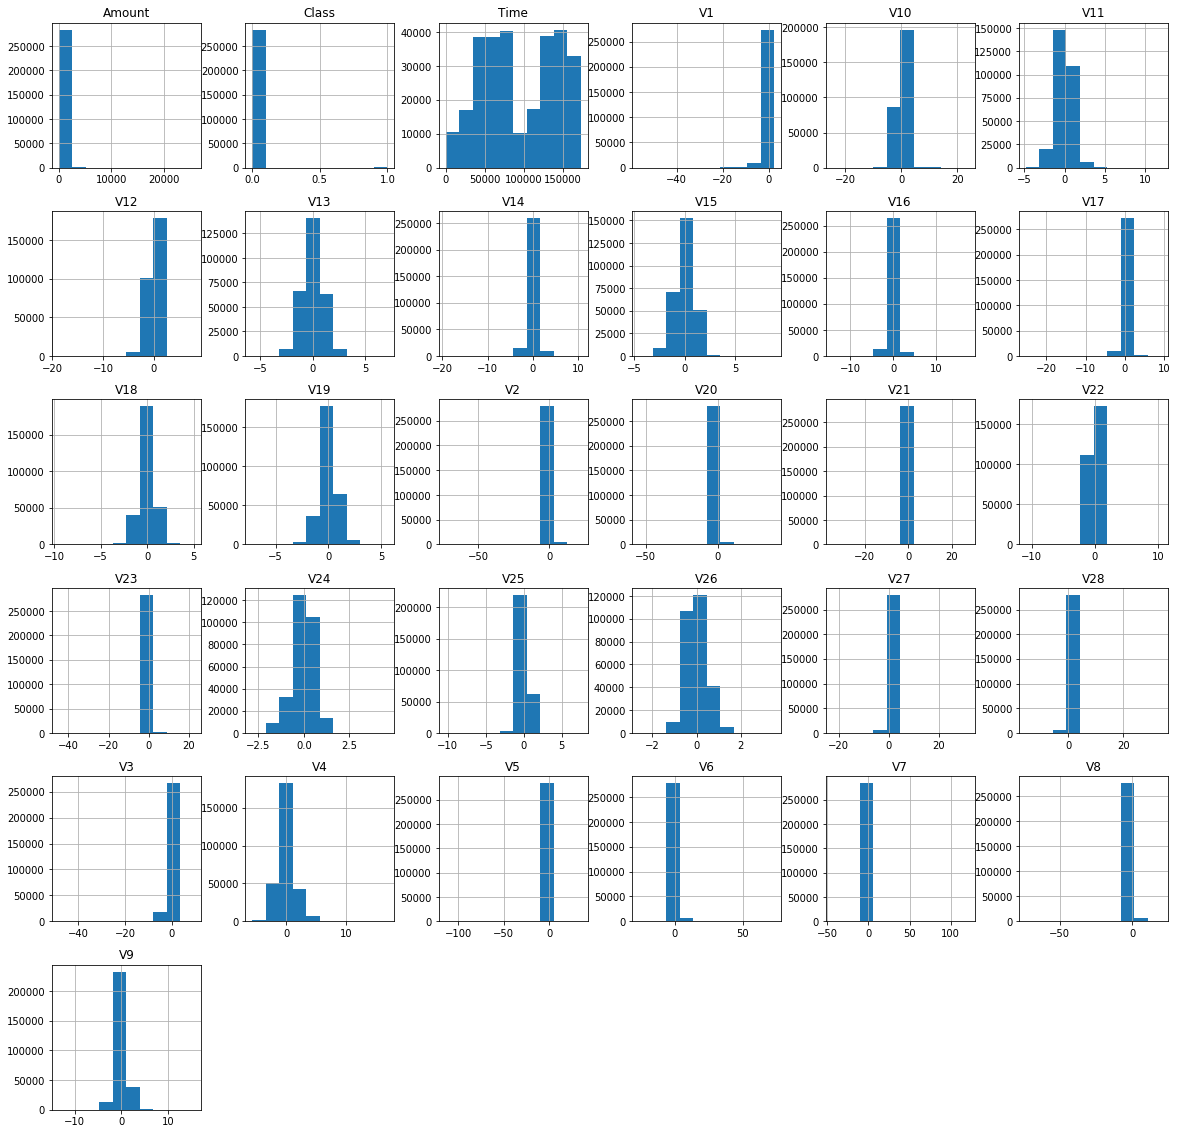

In [9]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

->from the graph wecan say that there are more no of normal transcations than fraud transcations.and also the data is not balanced

In [10]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [11]:
## finding the null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

-> from this we can say that there are no null values in data

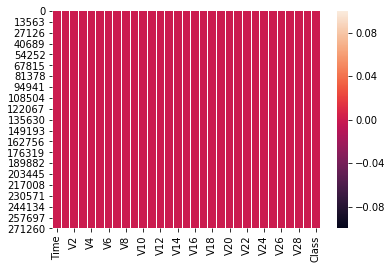

In [12]:
sns.heatmap(df.isna())

### data visualization

In [13]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

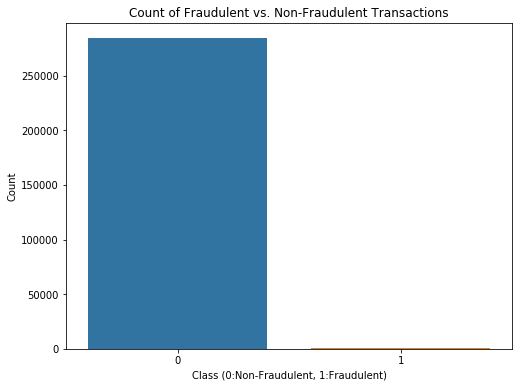

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [15]:

corr = df.corr()
corr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.124348  2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16   
V13    -0.065902 -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16   
V14    -0.098757  9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17   
V15    -0.183453 -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16   
V16     0.011903  6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16   
V17    -0.073297 -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16   
V18     0.090438  2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16   
V19     0.028975  1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16   
V20    -0.050866  1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16   
V21     0.044736 -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17   
V22     0.144059  7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16   
V23     0.051142  9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17   
V24    -0.016182  7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16   
V25    -0.233083 -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16   
V26    -0.041407 -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16   
V27    -0.005135  3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17   
V28    -0.009413  9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      6.391162e-17  2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16   
V2     -2.039868e-16  5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17   
V3     -1.436514e-15  1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16   
V4     -1.940929e-15 -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16   
V5      1.000000e+00  7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16   
V6      7.926364e-16  1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16   
V7     -4.209851e-16  1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16   
V8      7.589187e-16 -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16   
V9      4.205206e-16  1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00   
V10    -6.601716e-16  2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16   
V11     7.342759e-16  4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16   
V12     3.761033e-16  2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15   
V13    -9.578659e-16 -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16   
V14    -3.634803e-16  3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16   
V15    -5.132620e-16 -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15   
V16    -3.517076e-16 -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16   
V17     1.425729e-16  3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16   
V18     1.109525e-15  2.811474e-16 -1.116789e-16 -4.093852e

Text(0.5, 1, 'Heatmap of Correlation')

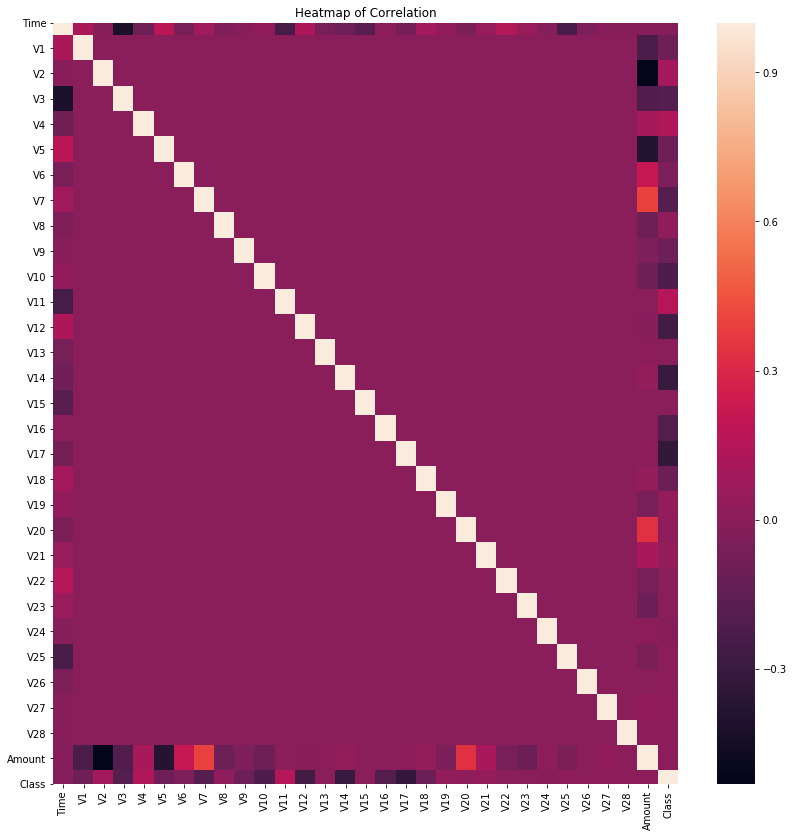

In [16]:
corr = df.corr()
plt.figure(figsize=(14,14))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [17]:

#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

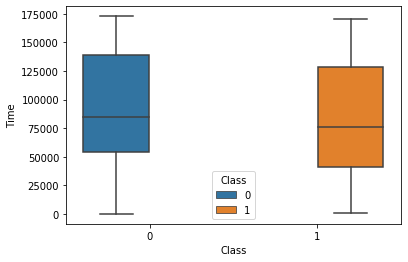

In [18]:
sns.boxplot(x="Class",y="Time",hue='Class',data=df)
plt.show()

-> by looking at the box  plot we can say that there is no certain distinction between the fraud and normal transcations during certain periods of time 

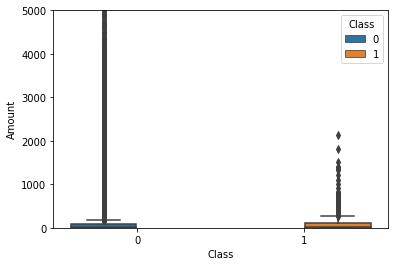

In [19]:
sns.boxplot(x="Class",y="Amount",hue="Class",data=df)
plt.ylim(0,5000)
plt.show()

from this we can say that there are no fraud transctions above the amount of 3000 and the transactions more than 3000 are normal 

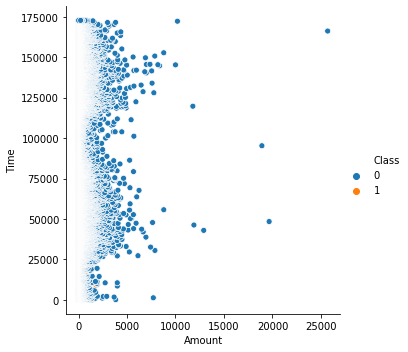

In [20]:
sns.relplot(x='Amount',y='Time',hue='Class',data=df)

->from this it reflects that there are lessno of fraud transactions than normal transactions

#### splitting the data

In [21]:
# input and output
X=df.drop('Class',axis=1)
y=df.Class

In [22]:
#Applying Standard Scaler in the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [23]:
#fitting the data set
X_std=sc.fit_transform(X)
X_std

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [24]:
# splitting into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , random_state=1)

In [25]:
X_train.shape

(199364, 30)

In [26]:
X_train

Time        V1        V2        V3        V4        V5        V6  \
191125  129124.0 -0.190075  0.203323 -0.996232 -1.596985  3.192579  3.356935   
153710   99901.0 -0.000313  1.041633 -0.318849 -0.429824  0.927591 -0.784796   
261216  159917.0  2.065603  0.071537 -1.892041  0.190985  0.681571 -0.286226   
190724  128961.0  2.025587  0.060125 -1.843486  0.347168  0.301427 -0.955263   
127492   78349.0 -0.482824  0.692865  1.397751  0.822699 -0.815530  0.143287   
...          ...       ...       ...       ...       ...       ...       ...   
21440    31666.0 -2.986845 -8.663978 -1.910863  0.664058 -3.934875  0.861269   
117583   74729.0  0.937083 -0.849673  0.524186 -0.020031 -0.606327  0.692302   
73349    55095.0 -1.149963  1.696462  1.637114  2.658991 -0.021502  0.192287   
267336  162728.0  1.754554 -0.699398 -0.076332  0.443915 -0.672082  0.389061   
128037   78576.0 -0.707635  0.493302  2.648089  1.064807 -0.680271  1.183838   

              V7        V8        V9  ...       V20       V21       V22  \
191125  0.288299  0.895003 -0.330024  ... -0.007496 -0.170599 -0.619724   
153710  0.815404 -0.175950  1.175180  ... -0.284525  0.160884  0.681572   
261216  0.051364 -0.040737  0.314773  ... -0.148721 -0.348255 -0.947148   
190724  0.073910 -0.137681  0.525494  ... -0.262006  0.219107  0.722795   
127492 -0.419970  0.605203 -0.650301  ...  0.207773  0.255948  0.566025   
...          ...       ...       ...  ...       ...       ...       ...   
21440   1.647511 -0.480963 -1.546866  ...  4.315113  1.252092 -0.993085   
117583 -0.463724  0.148857  0.785062  ...  0.396079 -0.143322 -0.479981   
73349   0.205204  0.588754 -1.187820  ... -0.127011  0.025147  0.086506   
267336 -0.807534  0.202915  0.858635  ...  0.088014  0.141950  0.358412   
128037  0.169413  0.074553  1.247988  ... -0.143786 -0.102350  0.323975   

             V23       V24       V25       V26       V27       V28   Amount  
191125  0.039651  0.706805 -0.160870  0.274825 -0.010541  0.022199    14.37  
153710 -0.313216 -0.556475 -0.077819 -0.218129 -0.095776  0.037814     9.00  
261216  0.270988 -0.011917 -0.234159  0.185280 -0.069232 -0.046179     1.98  
190724 -0.054034 -0.490497  0.212825 -0.091711 -0.011126 -0.047441     4.60  
127492  0.161260  0.057495 -1.055243  0.503132  0.069006  0.112114    46.87  
...          ...       ...       ...       ...       ...       ...      ...  
21440  -2.173147  0.145570 -0.235062 -0.227411 -0.382702  0.404045  2312.26  
117583 -0.237902 -0.715247  0.251418  0.975406 -0.060168  0.023771   171.32  
73349  -0.262748  0.321538  0.341667  0.210343 -0.162047  0.031193     7.58  
267336  0.259748  0.746839 -0.560808  0.104636 -0.005853 -0.019622    94.80  
128037 -0.172601  0.126965 -0.001998 -0.398741 -0.385589 -0.205589    57.80  

[199364 rows x 30 columns]

In [27]:
# scaling for train data we use fit_transform 
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data
scaled_X_train=pd.DataFrame(sc.fit_transform(X_train),
                            columns=X_train.columns)
scaled_X_train

# scaling for test data and for test we should only use transform
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_test=pd.DataFrame(sc.transform(X_test),
                            columns=X_train.columns)
scaled_X_test

Time        V1        V2        V3        V4        V5        V6  \
0      0.526644 -0.311159 -0.466100 -0.098088 -0.158494  1.462291 -1.512549   
1     -0.348861 -0.414691  0.798367  0.873992  0.019404 -0.208669 -0.490021   
2     -0.263726 -0.161440  0.676939  0.637703 -0.089477  0.408472 -0.399064   
3     -1.330858 -0.676664  0.616262  1.167100 -1.110472 -0.087922 -0.343105   
4     -0.294457  0.652095  0.373373 -0.379528  0.620441  0.041657 -1.102397   
...         ...       ...       ...       ...       ...       ...       ...   
85438 -0.337066  0.648961  0.072533 -0.213683  0.608369 -0.028659 -0.193174   
85439  0.595960  1.024352 -0.241517 -1.939784 -0.744871  1.833607  2.239866   
85440 -1.283046 -0.088930  0.661577  1.423288  1.435471  0.328697  0.406776   
85441  0.788872  1.021513 -0.291041 -0.437183  0.162890 -0.123230  0.251870   
85442 -1.286711  0.542403 -0.186323  0.382986  0.478970 -0.553821 -0.268745   

             V7        V8        V9  ...       V20       V21       V22  \
0      0.232529 -0.434778  0.329303  ... -0.253144 -0.101400  0.063203   
1      0.255854  0.363429 -0.637721  ... -0.011416 -0.173920 -0.507088   
2      0.564634 -0.053523 -0.418408  ...  0.266598 -0.413953 -1.066414   
3      0.545062 -0.025785  0.352418  ...  0.408527 -0.299103 -0.576565   
4      0.297705 -0.238499 -0.073744  ... -0.135830 -0.216748 -0.592252   
...         ...       ...       ...  ...       ...       ...       ...   
85438 -0.161911  0.041939  0.804223  ... -0.174355 -0.357242 -0.803257   
85439 -0.150349  0.548212  0.301066  ... -0.103696 -0.175443 -0.677665   
85440  0.419864 -0.116955 -0.950739  ...  0.306222  0.067209  0.484102   
85441 -0.523884  0.034036  1.048756  ... -0.047959  0.265093  1.066138   
85442 -0.266549  0.092194  0.529950  ... -0.138381  0.076936 -0.022481   

            V23       V24       V25       V26       V27       V28    Amount  
0      0.620539  0.037333 -4.255552 -0.415634  0.164570  0.651856 -0.345302  
1      0.147332  0.659755 -0.499323  0.168743  0.401047  0.173878 -0.344543  
2     -0.202654 -0.818135 -0.033764  0.253897  0.614589  0.271586 -0.348898  
3     -0.390765  0.015130  0.447306  1.690125  0.244185 -0.014476 -0.288610  
4     -0.125745  0.425029  1.059413  0.770365 -0.083815  0.121425 -0.349417  
...         ...       ...       ...       ...       ...       ...       ...  
85438 -0.329350 -1.173249  1.213101  0.993394 -0.022992  0.086164 -0.303273  
85439  0.405749  1.145074 -0.100597 -0.287489 -0.104539 -0.179906 -0.192646  
85440 -0.227335 -0.718638 -1.122123 -0.149386  0.069925 -0.136461 -0.291687  
85441  0.085797  0.198310 -0.201818  1.317328 -0.045931 -0.127933 -0.232638  
85442 -0.017794  0.110706  0.335757  0.779623 -0.060907  0.070745 -0.056930  

[85443 rows x 30 columns]

## training the model

### logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

C:\Users\Kiran Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
reg.score(X_train,y_train)

0.9989566822495536

In [30]:
reg.score(X_test,y_test)

0.9989934810341398

In [31]:
#predicting the model on train data
y_train_pred=reg.predict(X_train)


In [32]:
y_train== y_train_pred

191125    True
153710    True
261216    True
190724    True
127492    True
          ... 
21440     True
117583    True
73349     True
267336    True
128037    True
Name: Class, Length: 199364, dtype: bool

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199007
           1       0.72      0.68      0.70       357

    accuracy                           1.00    199364
   macro avg       0.86      0.84      0.85    199364
weighted avg       1.00      1.00      1.00    199364



In [34]:
#predicting the model on test data
y_test_pred=reg.predict(X_test)

In [35]:
y_test==y_test_pred

169876    True
127467    True
137900    True
21513     True
134700    True
          ... 
128956    True
177494    True
26287     True
198160    True
25893     True
Name: Class, Length: 85443, dtype: bool

In [36]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.62      0.66       135

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
#conusion matrix
matrix=confusion_matrix(y_test,y_test_pred)
print(matrix)

[[85273    35]
 [   51    84]]


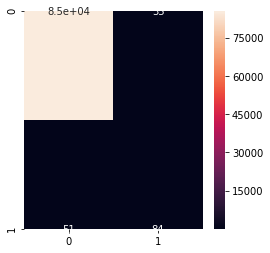

In [38]:
plt.figure(figsize = (4,4))
sns.heatmap(matrix,annot=True)

### knn

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn.score(X_test,y_test)

0.9984668141333989

In [41]:
knn.score(X_train,y_train)

0.9984199755221604

In [42]:
y_test_pred=knn.predict(X_test)

In [43]:
y_test==y_test_pred

169876    True
127467    True
137900    True
21513     True
134700    True
          ... 
128956    True
177494    True
26287     True
198160    True
25893     True
Name: Class, Length: 85443, dtype: bool

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       1.00      0.03      0.06       135

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.53     85443
weighted avg       1.00      1.00      1.00     85443



### random forest classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rfc.score(X_test,y_test)

0.9994850368081645

In [47]:
rfc.score(X_train,y_train)

1.0

In [48]:
y_test_pred=rfc.predict(X_test)

In [49]:
y_test==y_test_pred

169876    True
127467    True
137900    True
21513     True
134700    True
          ... 
128956    True
177494    True
26287     True
198160    True
25893     True
Name: Class, Length: 85443, dtype: bool

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.76      0.82       135

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [51]:
#conusion matrix
matrix=confusion_matrix(y_test,y_test_pred)
print(matrix)

[[85297    11]
 [   33   102]]


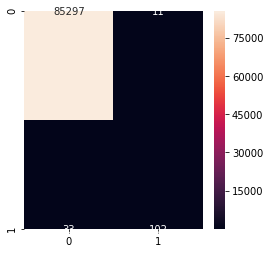

In [52]:
plt.figure(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt="d")

## comparing the recall values

Text(0.5, 1.0, 'recall Value comparison')

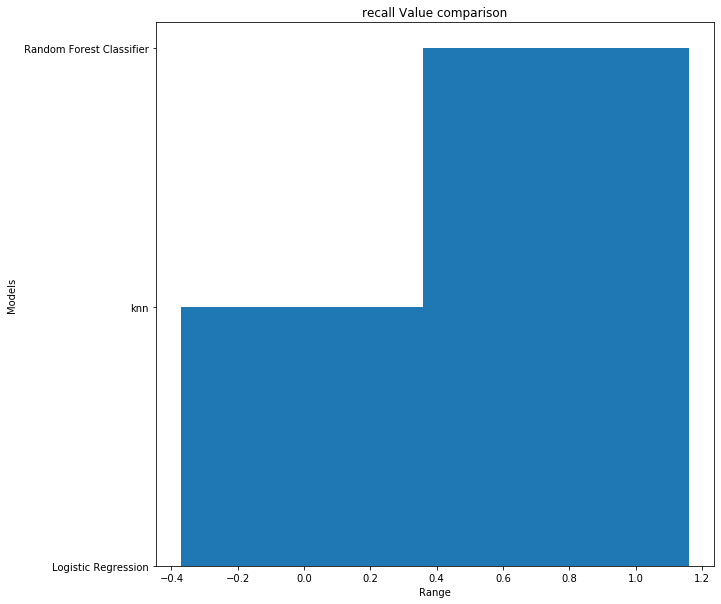

In [53]:
x=[ 0.62  , 0.03,0.76 ]
y=["Logistic Regression","knn"," Random Forest Classifier"]
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel("Range")
plt.ylabel("Models")
plt.title("recall Value comparison")

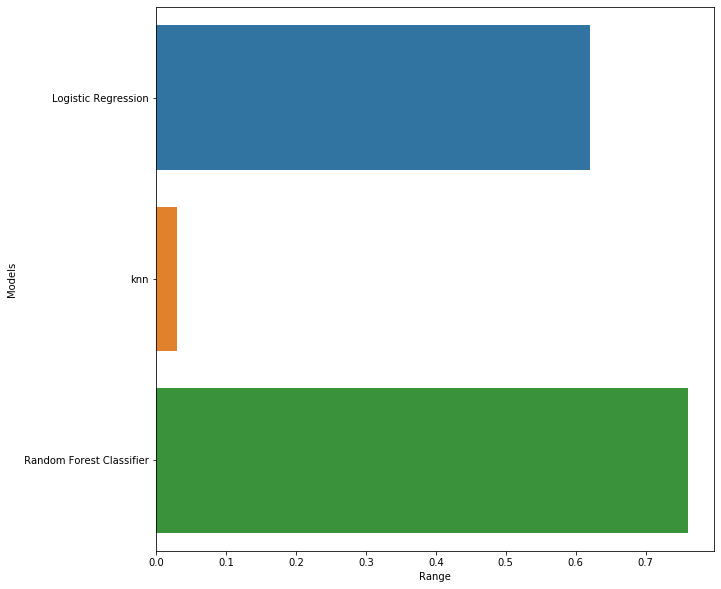

In [54]:
#barplot of the recall values
plt.figure(figsize=(10,10))
plt.xlabel("Range")
plt.ylabel("Models")
sns.barplot(x,y)

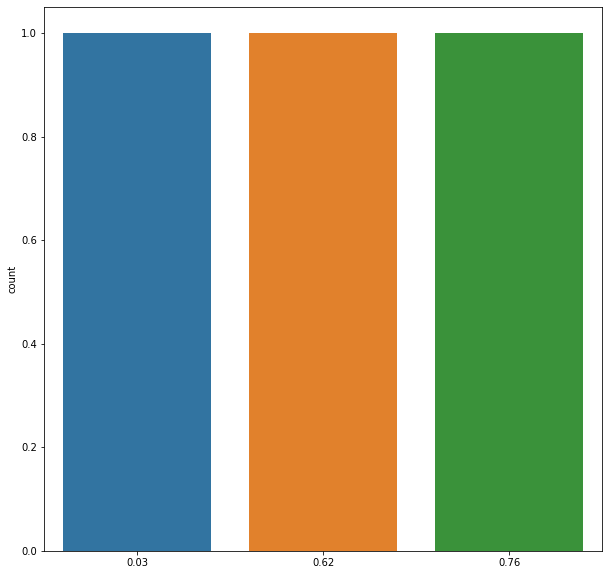

In [55]:
#countplot of the recall values
plt.figure(figsize=(10,10))
sns.countplot(x)

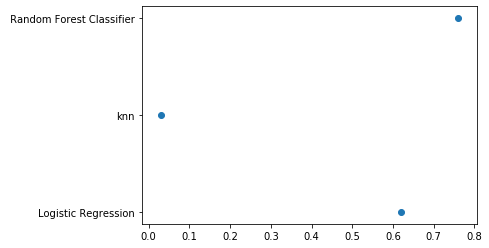

In [56]:
#by visualizing with scatter plot
plt.scatter(x,y) 
plt.show() 

Text(0.5, 1.0, 'f1-score Value comparison')

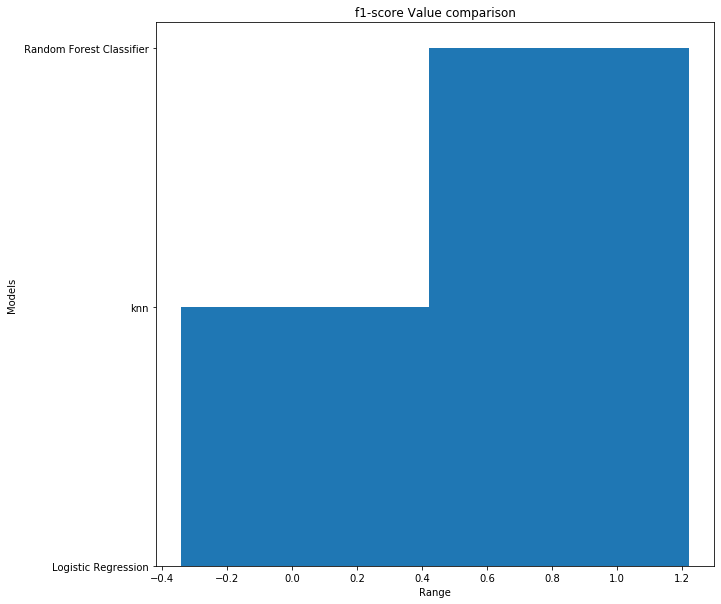

In [57]:
x=[0.66, 0.06 ,0.82 ]
y=["Logistic Regression","knn"," Random Forest Classifier"]
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel("Range")
plt.ylabel("Models")
plt.title("f1-score Value comparison")

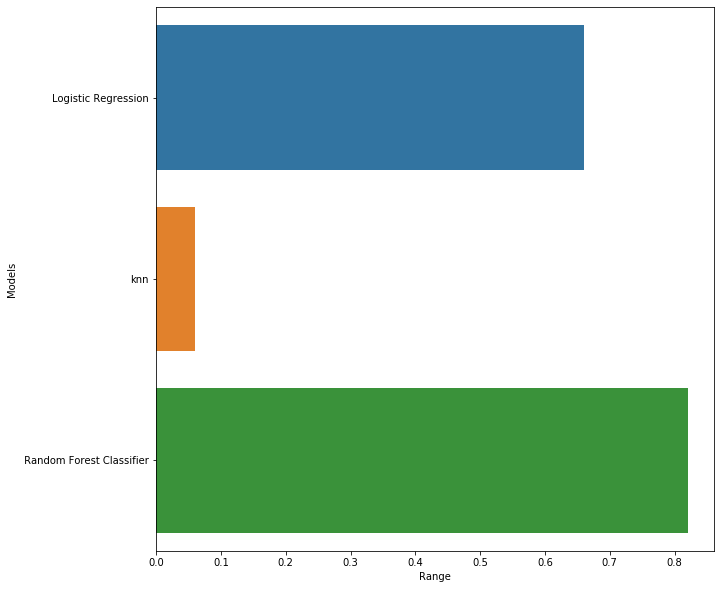

In [58]:
#barplot of the f1score values
plt.figure(figsize=(10,10))
plt.xlabel("Range")
plt.ylabel("Models")
sns.barplot(x,y)

Text(0.5, 1.0, 'precision Value comparison')

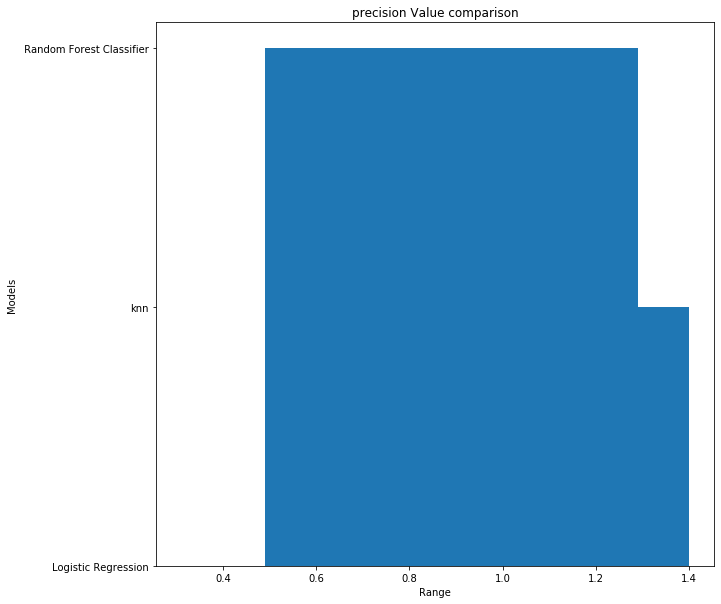

In [59]:
x=[0.71  ,1.00 ,  0.89     ]
y=["Logistic Regression","knn"," Random Forest Classifier"]
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel("Range")
plt.ylabel("Models")
plt.title("precision Value comparison")

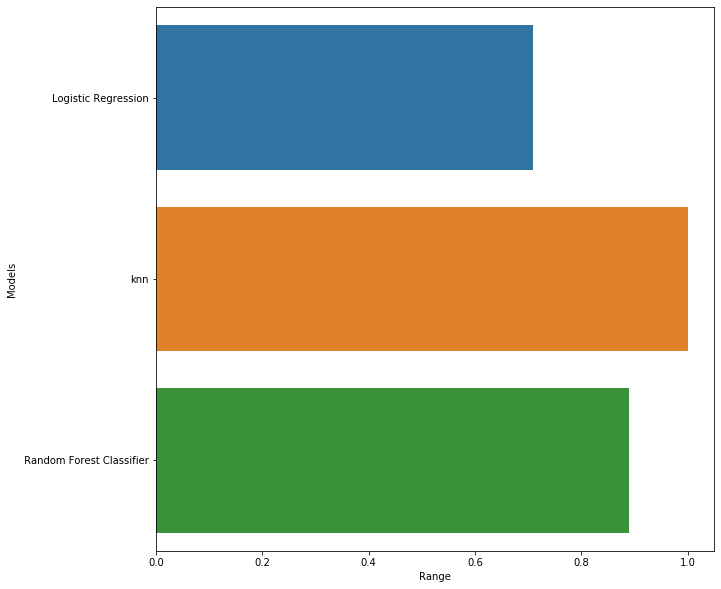

In [60]:
#barplot of the f1score values
plt.figure(figsize=(10,10))
plt.xlabel("Range")
plt.ylabel("Models")
sns.barplot(x,y)

->from the above visualizations by comparing precision,recall,f1-score values of the three methods(logistic regression,knn,random forest classifier)we can say that by using random forest classifer we can get the best ouput.


### grid searchCV

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=101)

In [62]:
param_grid = {
    'n_estimators':[60,70],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
rfc.score(X_test,y_test)

In [ ]:
rfc.score(X_train,y_train)

In [ ]:
y_test_pred=rfc.predict(X_test)

In [ ]:
y_test==y_test_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

-> i got the output mam i pasted it in the documentation and to check again i tried it with other values and its taking so much time .so i am submiting the file as it is mam


documentation link:
https://docs.google.com/document/d/1k-1wLzhGA7Q1jk7o2jMM_5XyvPN4Om19ZB1V4vBRNR4/edit?usp=sharing